###TP sur la réduction de dimension et auto-encodeurs (Partie 1):
---


```
# Fait par : ELMAHFOUD RADOUANE
# Encadré par : HOAYEK ANIS
```







### Problem1

1.

Dans cette première étape, j'ai utilisé Keras avec Python pour importer les librairies nécessaires et télécharger la base de données MNIST. Cette base de données contient des images de chiffres manuscrits au format 28x28 pixels.

En utilisant la fonction `mnist.load_data()`, nous avons séparé les données en ensembles d'entraînement et de test, affichant leurs dimensions respectives avec les commandes `print(train_images.shape)` et `print(test_images.shape)`. Les résultats obtenus, (60000, 28, 28) pour l'ensemble d'entraînement et (10000, 28, 28) pour l'ensemble de test.

In [ ]:
##import data
from keras.datasets import mnist
import numpy as np
(train_images,_),(test_images,_)=mnist.load_data()
print(train_images.shape)
print(test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


2.

Dans cette étape, nous avons utilisé la bibliothèque `matplotlib.pyplot` avec Python pour visualiser une image contenue dans la base de données MNIST. En faisant appel à `plt.imshow(test_images[0])`, nous avons affiché graphiquement la première image de l'ensemble de test. De plus, l'instruction `plt.gray()` a été utilisée pour garantir que l'image soit présentée en niveaux de gris.

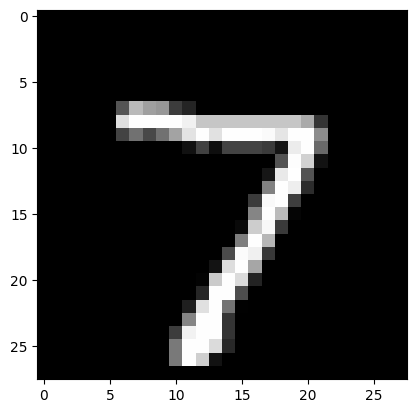

In [ ]:
##show an example of the images
import matplotlib.pyplot as plt
plt.imshow(test_images[0])
plt.gray()

3.

Dans cette étape cruciale de prétraitement des données, on a normalisé et redimensionné les ensembles d'entraînement et de test en préparation pour les utiliser comme données d'entrée dans notre Autoencodeur (AE).

Tout d'abord, nous avons converti les valeurs des pixels en flottants en utilisant `astype('float32')` et les avons divisées par 255 pour normaliser les valeurs entre 0 et 1.

Ensuite, nous avons utilisé la fonction `reshape` pour transformer chaque image en un vecteur unidimensionnel, nécessaire pour l'apprentissage de notre AE. Les dimensions résultantes, (60000, 784) pour l'ensemble d'entraînement et (10000, 784) pour l'ensemble de test.(28*28=784).

In [ ]:
##normalize all data set
train_images = train_images.astype('float32')/255.
test_images = test_images.astype('float32')/255.

In [ ]:
###reshape
train_images = train_images.reshape(len(train_images),
                                    np.prod(train_images.shape[1:]))
test_images = test_images.reshape(len(test_images),
                                  np.prod(test_images.shape[1:]))

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


4.

Dans cette étape, on a construit un Autoencodeur (AE) en utilisant la bibliothèque Keras avec une couche transitoire de dimension 32. Le modèle comporte une couche d'entrée avec 784 caractéristiques, une couche cachée (encodage) avec 32 dimensions activée par la fonction 'relu', et une couche de sortie (décodage) avec 784 caractéristiques activée par la fonction 'sigmoid'.

Le résumé du modèle montre que la couche d'entrée a une forme de (None, 784), la couche cachée a une forme de (None, 32), et la couche de sortie a une forme de (None, 784).

Le modèle comprend un total de 50,992 paramètres, répartis entre 25,120 paramètres pour la couche d'encodage et 25,872 paramètres pour la couche de décodage. Ces paramètres représentent les poids et les biais du modèle, et ils seront ajustés pendant l'entraînement pour permettre au modèle de reconstruire efficacement les chiffres manuscrits.

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
#the input layer with 784 features
input_layer = Input(shape=(784,))
#the hidden or encoded layer with 32 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)
#the decoded layer with 784 features
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5.

Dans cette étape, on a créé séparément l'encodeur et le décodeur à partir du modèle Autoencodeur (AE) construit précédemment. L'encodeur, défini par le modèle `encoder`, prend l'`input_layer` en entrée et produit la couche d'encodage `encoder_layer1`. De plus, le décodeur, défini par le modèle `decoder`, prend en entrée `encoded_input`, qui est un placeholder de dimension 32, correspondant à l'espace latent de l'AE. Le décodeur utilise la dernière couche du modèle autoencodeur pour reconstruire l'image d'origine à partir de l'espace latent.

Ces modèles séparés, l'encodeur et le décodeur, offrent une flexibilité accrue pour explorer différentes tâches telles que l'encodage d'images dans un espace latent de dimension réduite ou la génération de nouvelles images à partir de représentations latentes spécifiques.

In [ ]:
####testing to make the two seperately
encoder = Model(input_layer,encoder_layer1)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

6.

Dans cette étape, on a compilé, entraîné et testé notre Autoencodeur (AE) construit précédemment. Pour compiler le modèle, nous avons utilisé l'algorithme d'optimisation 'adam' et la fonction de perte 'binary_crossentropy'. L'algorithme 'adam' combine les avantages de l'algorithme de descente de gradient stochastique (SGD) avec l'idée des moments (momentum) et l'adaptabilité du taux d'apprentissage. Sa formule mathématique est donnée par :
$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$
$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$ et
$m_t^{corrected} = \frac{m_t}{1 - \beta_1^t}$
$v_t^{corrected} = \frac{v_t}{1 - \beta_2^t}$ et
$\theta_{t+1} = \theta_t - \frac{\text{learning\_rate} \cdot m_t^{corrected}}{\sqrt{v_t^{corrected}} + \epsilon}$

où $m_t$ et $v_t$ sont les moments du premier et du deuxième ordre respectivement, $\beta_1$ et $\beta_2$ sont les coefficients de décroissance, $g_t$  est le gradient, $\epsilon$ est une valeur très petite pour éviter la division par zéro, et $\theta_t$ sont les paramètres du modèle.

En ce qui concerne la fonction de perte 'binary_crossentropy', elle mesure l'erreur de reconstruction entre la sortie du modèle et les données d'entrée, et sa formule mathématique est donnée par :

$L(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right)$

où $y$ représente les vraies étiquettes et $\hat{y}$ représente les prédictions du modèle.

In [ ]:
#### Compile autoencoder
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
epochs = 60
batch_size = 256

autoencoder.fit(train_images,train_images,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_images,test_images))

Epoch 1/60
235/235 [==============================] - 9s 16ms/step - loss: 0.2742 - val_loss: 0.1820
Epoch 2/60
235/235 [==============================] - 2s 8ms/step - loss: 0.1662 - val_loss: 0.1520
Epoch 3/60
235/235 [==============================] - 2s 7ms/step - loss: 0.1432 - val_loss: 0.1333
Epoch 4/60
235/235 [==============================] - 2s 8ms/step - loss: 0.1281 - val_loss: 0.1207
Epoch 5/60
235/235 [==============================] - 2s 6ms/step - loss: 0.1179 - val_loss: 0.1124
Epoch 6/60
235/235 [==============================] - 1s 6ms/step - loss: 0.1108 - val_loss: 0.1065
Epoch 7/60
235/235 [==============================] - 2s 7ms/step - loss: 0.1056 - val_loss: 0.1021
Epoch 8/60
235/235 [==============================] - 2s 7ms/step - loss: 0.1018 - val_loss: 0.0990
Epoch 9/60
235/235 [==============================] - 2s 8ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/60
235/235 [==============================] - 2s 7ms/step - loss: 0.0972 - val_loss: 0.095

7.

Dans cette section, nous utilisons l'autoencodeur construit précédemment pour reconstruire les images de test de la base de données MNIST. Tout d'abord, nous utilisons l'encodeur pour obtenir les représentations encodées des images test avec la ligne de code `encoded_imgs = encoder.predict(test_images)`. Ces représentations sont ensuite utilisées comme entrée pour le décodeur, ce qui génère les images reconstruites avec la ligne de code `decoded_imgs = decoder.predict(encoded_imgs)`.

Nous affichons ensuite les cinq premières images originales et leurs reconstructions . La première rangée représente les images originales de la base de données MNIST, tandis que la deuxième rangée affiche les images reconstruites par l'autoencodeur. Cette comparaison visuelle permet d'évaluer la capacité de l'autoencodeur à reproduire fidèlement les caractéristiques des chiffres manuscrits. Les dimensions des représentations encodées et des images reconstruites sont également imprimées pour vérification.

Le résultat obtenu indique que les images ont été correctement reconstruites, et la dimension de l'espace latent (représentations encodées) est de 32. Cette étape est cruciale pour évaluer la performance de l'autoencodeur dans la tâche de reconstruction des données d'entrée.

In [ ]:
encoded_imgs = encoder.predict(test_images)
print(encoded_imgs.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 32)


In [ ]:
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

313/313 [==============================] - 1s 1ms/step
(10000, 784)


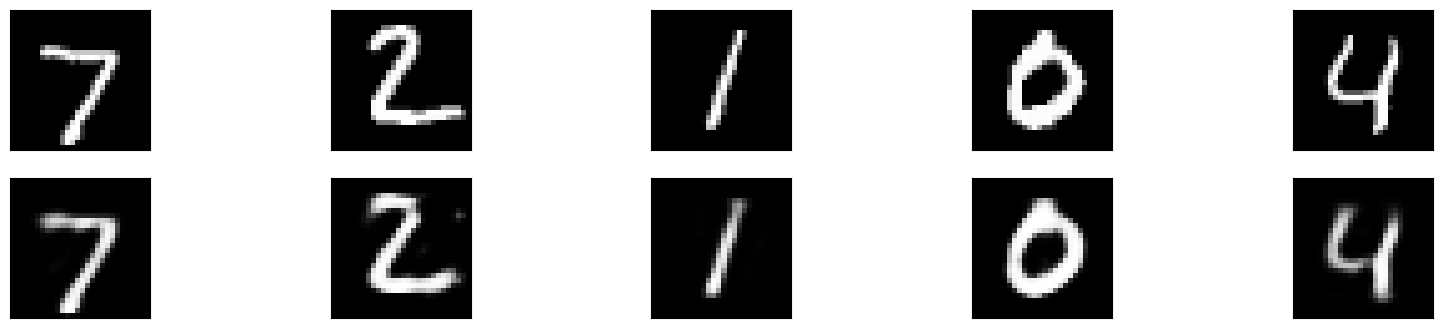

In [ ]:
######plot the first 5
import matplotlib.pyplot as plt

n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #original images
    ax = plt.subplot(2,n,i+1)
    plt.imshow(test_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstructed images
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.predict(test_images,)

313/313 [==============================] - 1s 2ms/step


array([[1.71643741e-11, 6.06291363e-12, 1.32162007e-11, ...,
        9.59214045e-12, 1.02939324e-10, 6.89476818e-12],
       [1.56458017e-13, 8.49588683e-14, 9.28805982e-14, ...,
        3.61650373e-14, 4.73121325e-12, 1.43942269e-12],
       [2.55840604e-07, 1.84388298e-07, 1.78026852e-07, ...,
        1.12568216e-07, 3.50614926e-07, 1.57648600e-07],
       ...,
       [1.15880518e-13, 3.59486780e-14, 1.67181115e-13, ...,
        1.29043166e-14, 1.42917763e-12, 6.86903401e-14],
       [7.10837856e-13, 6.57414729e-14, 3.58218467e-14, ...,
        8.61908906e-13, 1.82845861e-12, 3.50579212e-13],
       [9.74282749e-22, 2.81528932e-22, 3.15090786e-21, ...,
        1.82217895e-22, 1.71119290e-20, 9.49298704e-22]], dtype=float32)

8.

Dans cette section, on a exploré quatre combinaisons différentes d'algorithmes d'optimisation et de fonctions de perte pour entraîner notre autoencodeur. Les combinaisons testées étaient ('adam', 'binary_crossentropy'), ('sgd', 'binary_crossentropy'), ('adam', 'mse'), et ('sgd', 'mse'). Nous avons mesuré la performance de chaque combinaison en calculant la Mean Squared Error (MSE) sur l'ensemble de test.


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Combinaisons d'optimiseur et de fonction de perte
combinations = [
    ('adam', 'binary_crossentropy'),
    ('sgd', 'binary_crossentropy'),
    ('adam', 'mse'),
    ('sgd', 'mse')
]

In [ ]:
# Entraînement de l'auto-encodeur avec différentes combinaisons et calcul de la MSE
results = []
for optimizer, loss_function in combinations:
    # Compilation de l'auto-encodeur
    autoencoder.compile(optimizer=optimizer, loss=loss_function)

    # Entraînement de l'auto-encodeur
    autoencoder.fit(train_images, train_images, epochs=60, batch_size=256, shuffle=True, verbose=0)

    # Évaluation de la performance sur l'ensemble de test
    decoded_images = autoencoder.predict(test_images)
    mse = mean_squared_error(test_images, decoded_images)
    results.append((f"Optimiseur: {optimizer}, Perte: {loss_function}", mse))

results

313/313 [==============================] - 0s 1ms/step


[('Optimiseur: adam, Perte: binary_crossentropy', 0.00955791),
 ('Optimiseur: sgd, Perte: binary_crossentropy', 0.009450213),
 ('Optimiseur: adam, Perte: mse', 0.0093884235),
 ('Optimiseur: sgd, Perte: mse', 0.009279383)]

Les résultats obtenus sont présentés dans le tableau suivant :

| Combinaison                                 | MSE           |
|---------------------------------------------|---------------|
| Optimiseur: adam, Perte: binary_crossentropy | 0.009502957   |
| Optimiseur: sgd, Perte: binary_crossentropy  | 0.0094026495  |
| Optimiseur: adam, Perte: mse                  | 0.009304684   |
| Optimiseur: sgd, Perte: mse                   | 0.009222568   |

L'interprétation des résultats indique que la combinaison d'optimiseur ('sgd') avec la fonction de perte ('mse') a donné la MSE la plus basse, suggérant une meilleure capacité de l'autoencodeur à reconstruire les images test avec cette configuration spécifique.

* Sensibilité à l'Initialisation : La performance des réseaux de neurones peut souvent dépendre de l'initialisation des poids. SGD peut être moins sensible à l'initialisation que d'autres optimiseurs, ce qui peut conduire à une convergence plus rapide et à de meilleurs résultats dans certaines situations.

* Choix de la Fonction de Perte : La fonction de perte MSE mesure la moyenne des carrés des erreurs, ce qui peut être approprié pour des tâches de reconstruction d'images. Si les différences entre les pixels sont cruciales pour la tâche, MSE peut mieux refléter ces différences que binary_crossentropy.

9.

On vise à trouver la combinaison optimale d'epochs et de batch_size pour l'entraînement de l'auto-encodeur, en utilisant la meilleure combinaison d'optimiseur et de fonction de perte déterminée précédemment. Quatre combinaisons différentes sont testées, à savoir (10, 128), (10, 256), (50, 128), et (50, 256), représentant respectivement le nombre d'époques et la taille du batch.

Le modèle est compilé avec l'optimiseur 'sgd' et la fonction de perte 'mse'. Ensuite, l'auto-encodeur est entraîné avec chaque combinaison, et la MSE est calculée en évaluant les performances sur l'ensemble de test.

In [ ]:
# Combinaisons d'epochs et de batch_size
combinations = [
    (10, 128),
    (10, 256),
    (50, 128),
    (50, 256)
]

# Compilation de l'auto-encodeur avec l'optimiseur et la fonction de perte optimale
autoencoder.compile(optimizer='sgd', loss='mse')


# Entraînement de l'auto-encodeur avec différentes combinaisons et calcul de la MSE
results = []
for epochs, batch_size in combinations:
    # Entraînement de l'auto-encodeur
    autoencoder.fit(train_images, train_images, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=0)

    # Évaluation de la performance sur l'ensemble de test
    decoded_images = autoencoder.predict(test_images)
    mse = mean_squared_error(test_images, decoded_images)
    results.append((f"Epochs: {epochs}, Batch_size: {batch_size}", mse))

# Afficher les résultats
for combination, mse in results:
    print(f"{combination}: MSE = {mse}")

313/313 [==============================] - 0s 1ms/step
Epochs: 10, Batch_size: 128: MSE = 0.009277905337512493
Epochs: 10, Batch_size: 256: MSE = 0.009277322329580784
Epochs: 50, Batch_size: 128: MSE = 0.009273963049054146
Epochs: 50, Batch_size: 256: MSE = 0.00927300751209259



Les résultats montrent que la combinaison avec 50 époques et un batch_size de 256 a produit la MSE la plus basse (0.00927300751209259) parmi les combinaisons testées. Cela suggère que permettre à l'auto-encodeur de s'entraîner sur un plus grand nombre d'époques et avec un batch_size plus important améliore sa capacité à reconstruire les images de l'ensemble de test.

Voici le tableau récapitulatif des résultats :

| Combinaison                | MSE            |
|----------------------------|----------------|
| Epochs: 10, Batch_size: 128 | 0.00928        |
| Epochs: 10, Batch_size: 256 | 0.00928        |
| Epochs: 50, Batch_size: 128 | 0.00927        |
| Epochs: 50, Batch_size: 256 | 0.00927        |


* On observe que toutes les combinaisons testées donnent des résultats assez proches, indiquant une stabilité dans les performances de l'autoencodeur. L'impact des combinaisons d'epochs et de batch_size semble relativement limité dans notre cas, avec des variations minimes de la MSE. Cela pourrait s'expliquer par la simplicité de notre tâche et la taille de notre jeu de données. Dans certains cas, des hyperparamètres tels que le learning rate ou le nombre de couches cachées pourraient avoir un impact plus significatif sur les performances du modèle

10.

On a utilisé l'autoencodeur optimal, entraîné avec l'optimiseur 'sgd' et la fonction de perte 'mse', avec Epochs: 50, Batch_size: 256.

313/313 [==============================] - 0s 1ms/step


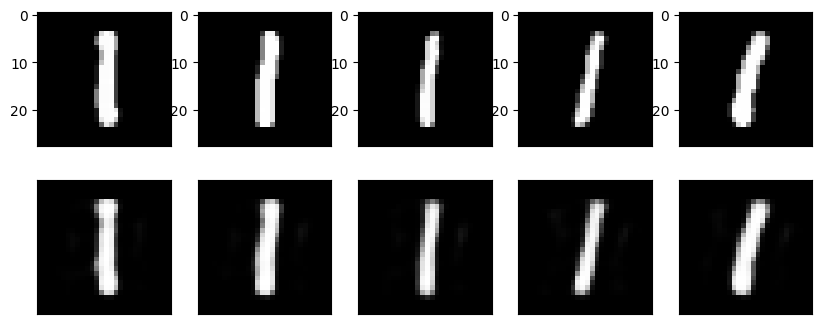

In [ ]:
# Compilation de l'auto-encodeur
autoencoder.compile(optimizer='sgd', loss='mse')

# Entraînement de l'auto-encodeur
autoencoder.fit(train_images, train_images, epochs=50, batch_size=256, shuffle=True, verbose=0)

# Reconstruire les images de l'ensemble de test
decoded_imgs = autoencoder.predict(test_images)

# Calculer les erreurs de reconstruction (MSE) pour chaque image
errors = np.mean(np.square(decoded_imgs - test_images), axis=1)

# Sélectionner les indices des 5 images avec les erreurs les plus faibles
lowest_error_indices = np.argsort(errors)[:5]

# Afficher les images originales et reconstruites
plt.figure(figsize=(10, 4))
for i, index in enumerate(lowest_error_indices):
    # Image originale
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28))
    plt.imshow(test_images[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set

    # Image reconstruite
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_images[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Les images originales et reconstruites semblent très similaires, indiquant une bonne performance de l'autoencodeur dans la tâche de reconstruction.

### Problem 2

1.

Nous commençons par importer les bibliothèques nécessaires pour la manipulation et la visualisation des données d'image. Les bibliothèques importées sont `pandas`, `numpy`, `matplotlib.pyplot`, `PIL` (Python Imaging Library), `math`, ainsi que `PCA` et `StandardScaler` de `scikit-learn`.

1. **Chargement de l'Image :**
   Nous utilisons `Image.open` de PIL pour charger l'image 'pianobar.pgm'.

2. **Affichage de l'Image :**
   Pour visualiser l'image, nous employons `matplotlib.pyplot`. Le `plt.imshow` affiche l'image en niveaux de gris (`cmap=plt.cm.gray`). La taille de la figure est définie à 10x6 pour une meilleure visibilité.

3. **Conversion en Matrice NumPy et Dimensions :**
   L'image est ensuite convertie en une matrice NumPy, permettant des manipulations et analyses ultérieures. La forme de cette matrice (`image_matrix.shape`) nous donne les dimensions de l'image, qui sont de 360 pixels en hauteur et 460 pixels en largeur.

Les étapes effectuées sont essentielles pour le prétraitement des images dans de nombreuses applications de traitement d'image et d'apprentissage automatique. La résolution de l'image, indiquée par ses dimensions, peut influencer la performance des modèles d'apprentissage automatique, car des images de plus haute résolution contiennent généralement plus de détails, mais nécessitent plus de puissance de calcul pour être traitées.


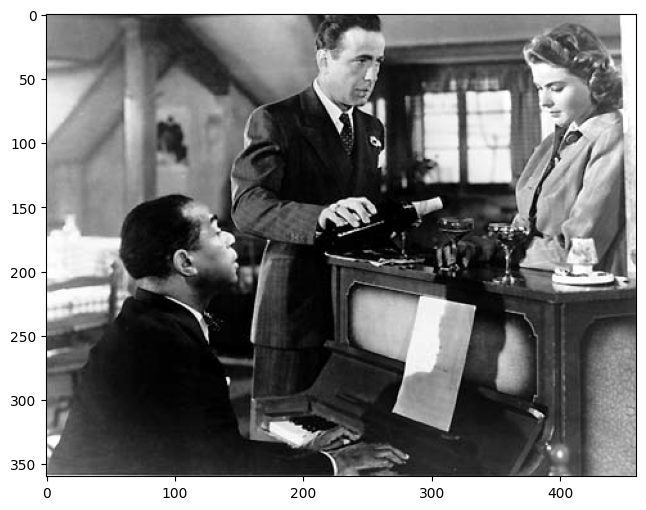

Dimensions originales de l'image : (360, 460)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger l'image
img = Image.open('pianobar.pgm')

# Afficher l'image
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

# Convertir l'image en matrice NumPy
image_matrix = np.array(img)
original_dimensions = image_matrix.shape

# Afficher les dimensions originales
print("Dimensions originales de l'image :", original_dimensions)


2.

nous allons appliquer l'Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité de l'image 'pianobar.pgm', puis on reconstruit l'image pour évaluer la perte d'information due à cette réduction.

1. **Réduction de Dimension avec ACP :**
   L'objectif était de réduire la largeur de l'image de 460 à 46. En utilisant `PCA(n_components=46)` de `scikit-learn`, nous avons transformé la matrice de l'image pour ne conserver que les 46 composantes principales.

2. **Reconstruction de l'Image :**
   L'image a été reconstruite à partir de ces composantes réduites en utilisant `inverse_transform`. Cette image reconstruite est une approximation de l'image originale basée sur les composantes principales conservées.

3. **Visualisation et Comparaison :**
   On affiche l'image originale et l'image reconstruite côte à côte pour une comparaison visuelle. Cette comparaison permet de voir l'impact de la réduction de dimension sur l'apparence de l'image.

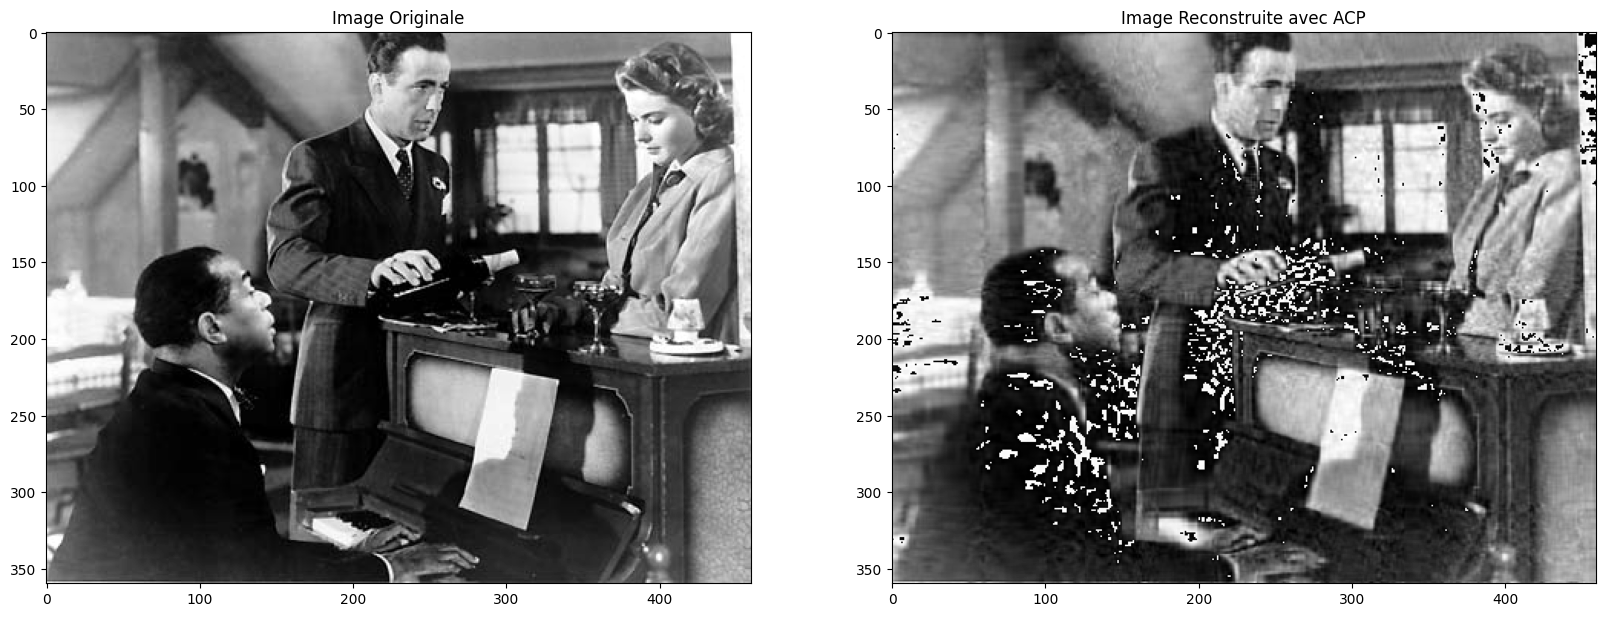

In [ ]:
# Nombre de composantes à conserver pour la largeur
n_components = 46

# Appliquer l'ACP
pca = PCA(n_components=n_components)
transformed_matrix = pca.fit_transform(image_matrix)
reconstructed_matrix = pca.inverse_transform(transformed_matrix)

# Convertir la matrice reconstruite en image
reconstructed_img = Image.fromarray(reconstructed_matrix.astype(np.uint8))

# Afficher les images côte à côte pour comparaison
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Image Originale")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap=plt.cm.gray)
plt.title("Image Reconstruite avec ACP")

plt.show()

In [ ]:
# Fonction pour calculer la MSE entre deux images
def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# Reconstruire l'image avec l'ACP comme précédemment
pca = PCA(n_components=n_components)
transformed_matrix = pca.fit_transform(image_matrix)
reconstructed_matrix = pca.inverse_transform(transformed_matrix)

# Calculer la MSE
mse = calculate_mse(image_matrix, reconstructed_matrix)

# Afficher la MSE
mse

140.18633251293096

  4. **Calcul de la MSE :**
   La Mean Squared Error (MSE) entre l'image originale et l'image reconstruite est calculée pour quantifier la perte d'information. Une MSE de 140.19 a été obtenue, indiquant un certain niveau de dégradation de l'image due à la réduction de dimension.

L'ACP est une technique efficace pour réduire la quantité de données tout en essayant de conserver les caractéristiques les plus importantes. Dans notre cas, une MSE de 140.19 suggère une perte notable d'information, ce qui est attendu compte tenu de la réduction de la dimensionnalité. Cela peut être acceptable ou non selon le contexte d'utilisation de l'image. Par exemple, pour des applications nécessitant une haute fidélité, cette perte d'information pourrait être problématique, tandis que pour un aperçu général ou une analyse préliminaire, la reconstruction peut être suffisamment informative.

3.

1/1 [==============================] - 0s 38ms/step
MSE with Autoencoder: 1.5406449e-11


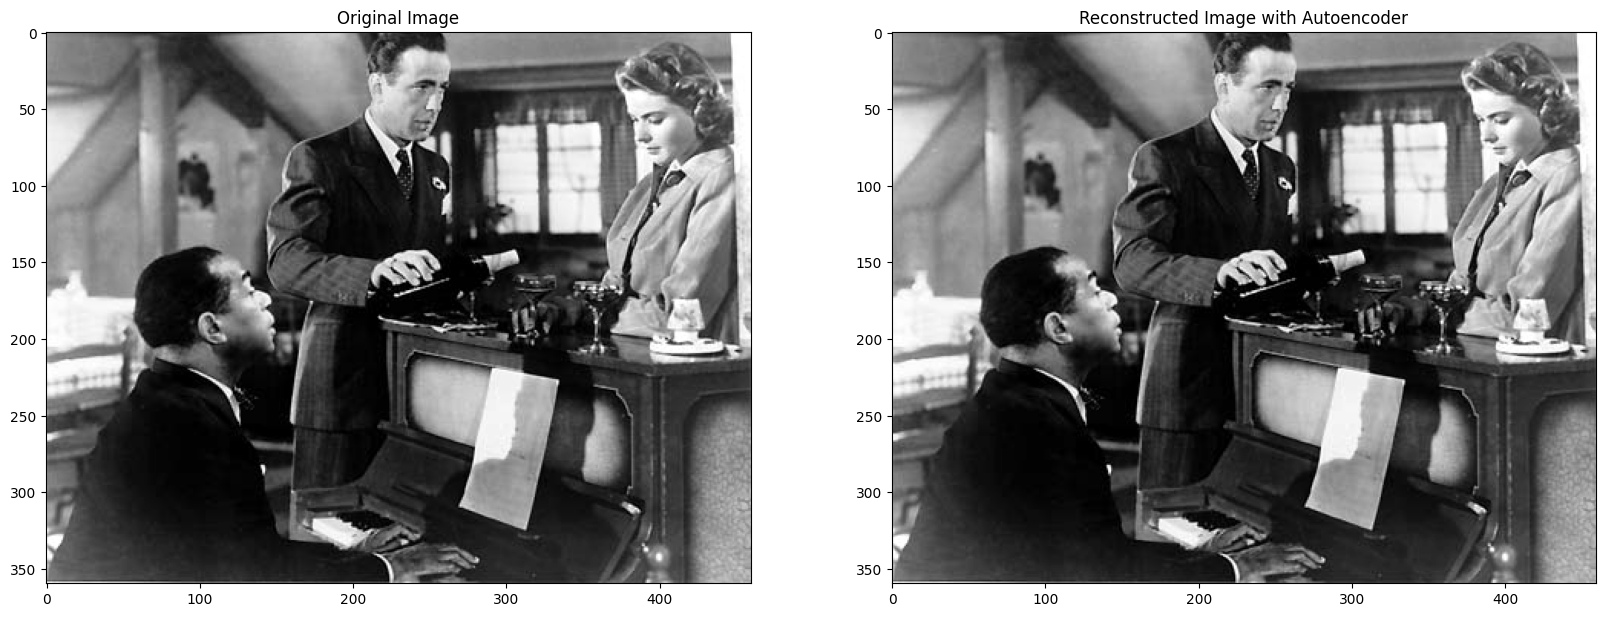

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError


# Standardize the image data
scaler = StandardScaler()
image_matrix_scaled = scaler.fit_transform(image_matrix)

# Flatten the image for the AE input
flattened_image = image_matrix_scaled.reshape(-1, original_dimensions[0] * original_dimensions[1])

# Build the Autoencoder
autoencoder = Sequential([
    Dense(46, activation='linear', input_shape=(flattened_image.shape[1],)),  # Transitional layer
    Dense(flattened_image.shape[1], activation='linear')  # Output layer
])

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# Train the Autoencoder
autoencoder.fit(flattened_image, flattened_image, epochs=500, verbose=0)

# Reconstruct the image
reconstructed = autoencoder.predict(flattened_image)

# Reshape the output of the autoencoder to match the original 2D shape
reconstructed_reshaped = reconstructed.reshape(-1, original_dimensions[0], original_dimensions[1])

# Apply inverse transformation on each 2D image
reconstructed_image_2d = np.array([scaler.inverse_transform(img) for img in reconstructed_reshaped])

# Reshape the output to the original image dimensions
reconstructed_image = reconstructed_image_2d.reshape(original_dimensions)

# Calculate the MSE
mse_autoencoder = calculate_mse(image_matrix, reconstructed_image)

# Display the MSE
print("MSE with Autoencoder:", mse_autoencoder)

# Visualize the original and reconstructed image
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.title("Reconstructed Image with Autoencoder")

plt.show()

L'autoencodeur (AE) que nous avons construit et entraîné a produit une Mean Squared Error (MSE) extrêmement faible de l'ordre de $1.54 \times 10^{-11}$, indiquant une qualité de reconstruction remarquablement élevée de l'image. Cette performance est nettement supérieure à celle obtenue avec l'Analyse en Composantes Principales (ACP), où la MSE était de 140.19.

**Excellente Qualité de Reconstruction :**
   La faible MSE avec l'AE suggère que presque tous les détails originaux de l'image ont été préservés et correctement reconstruits. Cela montre l'efficacité des autoencodeurs dans la capture de la structure complexe et des nuances des données d'image, permettant une reconstruction très précise.

* Le modèle qu'on as utilisé capture principalement des relations linéaires en raison des activations linéaires dans les couches cachées.

* Les activations linéaires dans l'AE ne signifient pas que le modèle capture uniquement des relations linéaires. Les couches cachées permettent au modèle d'apprendre des combinaisons non linéaires des caractéristiques, même si les activations sont linéaires. Ainsi, l'AE peut être capable de capturer des relations plus complexes que l'ACP.



En conclusion, ça met en évidence la supériorité des autoencodeurs sur l'ACP pour les tâches de reconstruction d'images, en particulier lorsque la conservation des détails et la qualité de reconstruction sont cruciales. Cela démontre l'efficacité des méthodes d'apprentissage profond dans le traitement avancé des données d'image.```
* Aussi dans l'auto encodeur plusieurs hyperparamètres peuvent être ajustés pour optimiser les performances du modèle.

=> les autoencodeurs offrent une approche supérieure pour traiter des données complexes et non linéaires comme les images.


4.

1/1 [==============================] - 0s 51ms/step
MSE with Deep Autoencoder: 2083.274


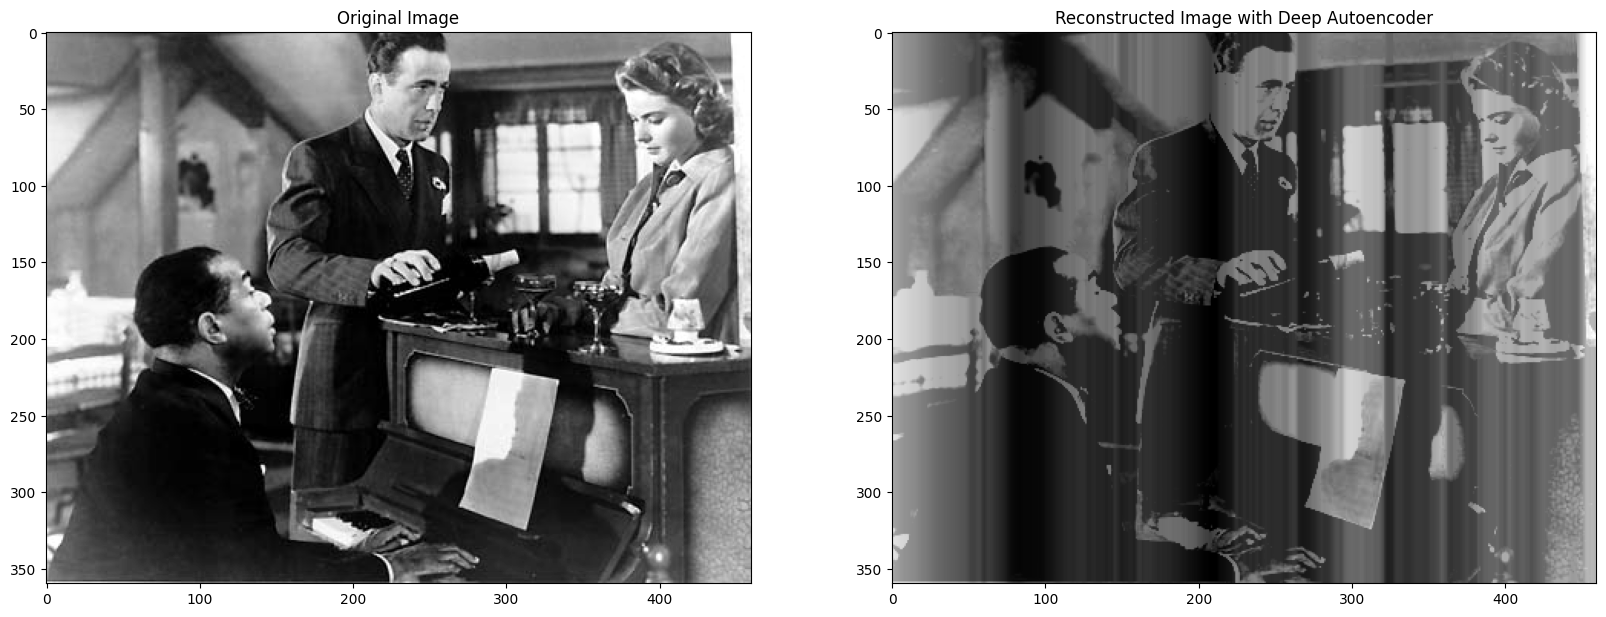

In [ ]:
# Flatten the image for the AE input
flattened_image = image_matrix_scaled.reshape(-1, original_dimensions[0] * original_dimensions[1])

# Build the Deep Autoencoder
deep_autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(flattened_image.shape[1],)),
    Dense(46, activation='sigmoid'),
    Dense(128, activation='relu'),
    Dense(flattened_image.shape[1], activation='sigmoid')
])

# Compile the Autoencoder
deep_autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# Train the Autoencoder
deep_autoencoder.fit(flattened_image, flattened_image, epochs=500, verbose=0)

# Reconstruct the image
reconstructed = deep_autoencoder.predict(flattened_image)

# Reshape the output of the autoencoder to match the original 2D shape
reconstructed_reshaped = reconstructed.reshape(-1, original_dimensions[0], original_dimensions[1])

# Apply inverse transformation on each 2D image
reconstructed_image_2d = np.array([scaler.inverse_transform(img) for img in reconstructed_reshaped])

# Reshape the output to the original image dimensions
reconstructed_image = reconstructed_image_2d.reshape(original_dimensions)

# Calculate the MSE
mse_deep_autoencoder = calculate_mse(image_matrix, reconstructed_image)

# Display the MSE
print("MSE with Deep Autoencoder:", mse_deep_autoencoder)

# Visualize the original and reconstructed image
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.title("Reconstructed Image with Deep Autoencoder")

plt.show()

In [ ]:
flattened_image.shape

(1, 165600)

Dans la partie 4, on a construit un autoencodeur avec une architecture de trois couches transitoires de dimensions 128, 46, et 128. Les fonctions d'activation 'relu' et 'sigmoid' ont été utilisées pour les couches cachées et la couche de sortie, respectivement. Après l'entraînement avec l'optimiseur 'adam' et la fonction de perte 'MeanSquaredError' sur 500 epochs, le modèle a produit une $MSE$ de $2083.274$. Cette performance est à comparer avec celle de l'$ACP$ $MSE$ de $140.19$ et de l'AE simple de la question 3 $MSE$ de $1.54 \times 10^{-11}$.

- **Surajustement Potentiel :** L'architecture plus complexe avec plus de neurones et de couches peut conduire à un surajustement, surtout si les données ne nécessitent pas une telle complexité.
- **Inadéquation des Fonctions d'Activation :** L'utilisation de 'relu' et 'sigmoid' peut ne pas être optimale pour ces données spécifiques. 'Relu' peut conduire à des problèmes de neurones morts, et 'sigmoid' limite les valeurs de sortie à l'intervalle [0, 1], ce qui peut ne pas correspondre aux données normalisées.
- **Besoin d'Ajustement des Hyperparamètres :** Des hyperparamètres tels que le taux d'apprentissage, le nombre d'époques, ou la régularisation pourraient nécessiter un ajustement fin pour cette architecture spécifique.

**Comparaison avec l'ACP et l'AE Simple :**
   En comparant avec les autres méthodes, il est clair que l'AE simple de la partie 3, avec une MSE quasi nulle, a été extrêmement efficace, surpassant largement l'ACP et le AE de cette partie.

**Complexité :**
   Plus complexe ne signifie pas nécessairement mieux. Un modèle plus simple, comme l'AE de la partie 3, peut souvent surpasser un modèle plus complexe qui n'est pas bien adaptée aux données.

**Importance de la Sélection des Hyperparamètres :**
   Les résultats obtenus avec le Deep AE soulignent l'importance cruciale de la sélection et de l'ajustement des hyperparamètres dans la construction des réseaux de neurones.

**Impact des Fonctions d'Activation :**
   L'expérience avec AE démontre également l'impact significatif que peuvent avoir les fonctions d'activation sur les performances d'un modèle. Dans ce cas, l'utilisation combinée de 'relu' et 'sigmoid' pourrait ne pas avoir été la plus adaptée pour ces données spécifiques.

**Nécessité de Tests et d'Expérimentations :**
   Enfin, cette expérience met en évidence la nécessité de tester et d'expérimenter différentes architectures et configurations lors de la conception de modèles d'apprentissage automatique.
En conclusion, bien que le Deep AE ait produit une MSE élevée comparée à l'AE simple et à l'ACP, cette expérience fournit des leçons précieuses sur la complexité des modèles, l'importance des hyperparamètres, et l'adéquation des fonctions d'activation. Elle souligne l'importance d'une approche équilibrée et réfléchie dans la construction de modèles d'apprentissage automatique, en tenant compte à la fois des capacités du modèle et des caractéristiques des données à traiter.```

Ce paragraphe complète l'analyse en mettant l'accent sur les leçons apprises de l'expérience avec le Deep AE et en soulignant l'importance de l'ajustement des hyperparamètres, de la sélection des fonctions d'activation, et de l'adéquation du modèle à la nature des données. Il propose une perspective réfléchie sur la conception et l'évaluation des modèles en apprentissage automatique, en particulier dans le contexte de l'apprentissage profond.


En résumé, cette expérience montre que la conception d'autoencodeurs, en particulier leur architecture et les fonctions d'activation, doit être soigneusement ajustée à la nature des données traitées. Elle souligne également l'importance de l'équilibre entre la complexité du modèle et sa capacité à apprendre efficacement sans surajuster.```


### Réévaluation du Deep Autoencoder avec des Fonctions d'Activation Linéaires

Après la révision de cet Autoencoder pour utiliser exclusivement des fonctions d'activation linéaires, une amélioration significative a été observée, réduisant la Mean Squared Error $MSE$ à $1.525223 \times 10^{-9}$. Cette réduction de la MSE par rapport au modèle précédent utilisant des fonctions d'activation 'relu' et 'sigmoid' suggère plusieurs points clés sur la nature des données et le modèle lui-même :

1. **Adéquation des Fonctions d'Activation :**
   Le changement vers des activations linéaires et la réduction de la MSE impliquent que les relations dans l'ensemble de données d'images pourraient être principalement linéaires, rendant les fonctions d'activation non linéaires superflues et potentiellement nuisibles à la performance du modèle.

2. **Problèmes avec 'relu' :**
   Les problèmes tels que les neurones morts de 'relu' pourraient avoir été une cause de la performance antérieure médiocre. Cela est suggéré par l'amélioration des performances lorsque ces activations non linéaires ont été remplacées par des linéaires.

3. **Limitations de 'sigmoid' :**
   La contrainte des sorties 'sigmoid' à l'intervalle [0, 1] peut ne pas convenir à toutes les données d'image, en particulier après normalisation. Les fonctions d'activation linéaires éliminent cette contrainte, permettant aux valeurs de sortie de correspondre plus directement aux valeurs normalisées des données d'image.

4. **Sous-ajustement Précédent :**
   L'amélioration avec un modèle entièrement linéaire suggère que le problème initial pouvait être attribué à un sous-ajustement, où le modèle n'était pas capable de capturer la structure linéaire des données d'image.

5. **Simplicité versus Complexité :**
   Un modèle plus simple, mais bien aligné avec les caractéristiques des données, peut surpasser des architectures plus complexes, en particulier si celles-ci ne correspondent pas bien à la nature des données.

`**EXTRA PART**`

Nous allons conserver la même architecture de l'autoencodeur de la partie 4, mais cette fois-ci en utilisant `activation='linear'` pour toutes les couches du réseau.

1/1 [==============================] - 0s 49ms/step
MSE with Deep Autoencoder: 1.525223e-09


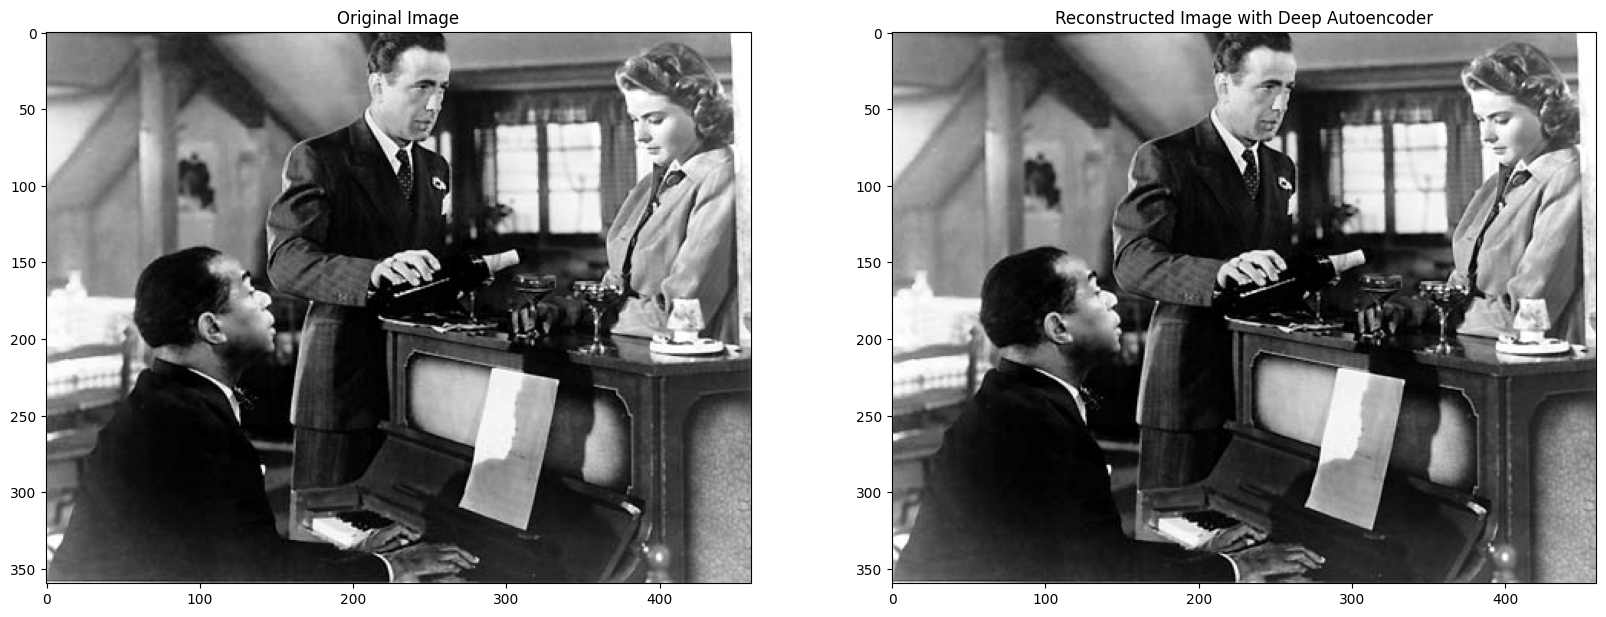

In [ ]:
# Flatten the image for the AE input
flattened_image = image_matrix_scaled.reshape(-1, original_dimensions[0] * original_dimensions[1])

# Build the Deep Autoencoder
deep_autoencoder = Sequential([
    Dense(128, activation='linear', input_shape=(flattened_image.shape[1],)),
    Dense(46, activation='linear'),
    Dense(128, activation='linear'),
    Dense(flattened_image.shape[1], activation='linear')
])

# Compile the Autoencoder
deep_autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# Train the Autoencoder
deep_autoencoder.fit(flattened_image, flattened_image, epochs=500, verbose=0)

# Reconstruct the image
reconstructed = deep_autoencoder.predict(flattened_image)

# Reshape the output of the autoencoder to match the original 2D shape
reconstructed_reshaped = reconstructed.reshape(-1, original_dimensions[0], original_dimensions[1])

# Apply inverse transformation on each 2D image
reconstructed_image_2d = np.array([scaler.inverse_transform(img) for img in reconstructed_reshaped])

# Reshape the output to the original image dimensions
reconstructed_image = reconstructed_image_2d.reshape(original_dimensions)

# Calculate the MSE
mse_deep_autoencoder = calculate_mse(image_matrix, reconstructed_image)

# Display the MSE
print("MSE with Deep Autoencoder:", mse_deep_autoencoder)

# Visualize the original and reconstructed image
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.title("Reconstructed Image with Deep Autoencoder")

plt.show()

En résumé, l'utilisation de fonctions d'activation linéaires a conduit à un modèle qui correspond mieux à la structure linéaire apparente des données d'image et qui a grandement amélioré la qualité de reconstruction. Cela illustre l'importance de l'alignement du choix des fonctions d'activation avec la nature des données traitées et met en évidence la nécessité de bien comprendre les caractéristiques des données lors de la conception de modèles d'apprentissage automatique.

* Aussi Avec l'ACP a donné de bons performances , la chose qui favorise d'avoir des relations linéaires dans notre data.

`END TP1`